<a href="https://colab.research.google.com/github/smlrkh1107/Python3/blob/astronomy/%EC%B2%9C%EB%AC%B8%EC%9A%B0%EC%A3%BC_Lecture2(Understanding_Statistics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Lecture 2]
* fitsfile.py & HorseHead.fits 파일 올리기

In [10]:
#gits에 코드 오지게떠서 일단 주석처리!
#코랩에 내 컴퓨터에 있는 파일 업로드 !! 버튼뜸.
from google.colab import files
files.upload();

Saving fitsfile.py to fitsfile.py


In [11]:
#####
#gits에 코드 오지게떠서 일단 주석처리!
#코랩에 내 컴퓨터에 있는 파일 업로드 !! 버튼뜸.
from google.colab import files
files.upload();

Saving HorseHead.fits to HorseHead.fits


##01. Dynamic Range

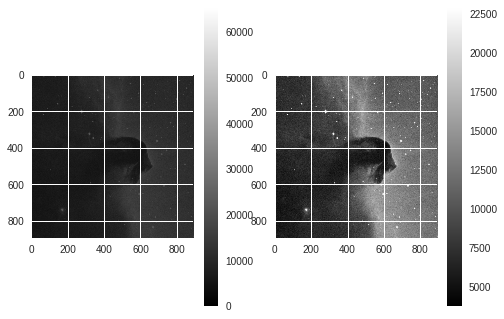

In [61]:
#
# SAMPLE 01. Dynamic Range
#

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import fitsfile

#
# Load a FITS file.
fits = fitsfile.FitsFile()
fits.load_file("HorseHead.fits")

#
#
min = np.min(fits.data)
max = np.max(fits.data)

#
#

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(fits.data, cmap=cm.gray, vmin=0.0, vmax=65536)
plt.colorbar(im1, ax=ax1)

ax1 = fig.add_subplot(1,2,2)
im1 = ax1.imshow(fits.data, cmap=cm.gray, vmin=min, vmax=max)
plt.colorbar(im1, ax=ax1)
 
#mng = plt.get_current_fig_manager() # Linux 버전용
#mng.window.showMaximized()
plt.show()



##02. 히스토그램

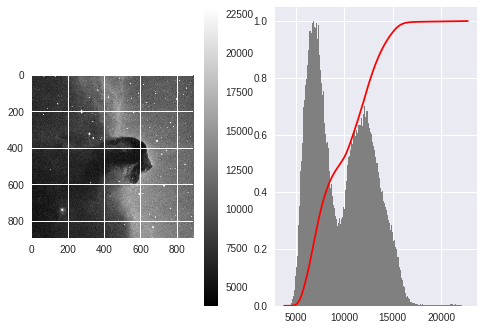

In [47]:
#
# SAMPLE 02. Histogram
#



#
min = np.min(fits.data)
max = np.max(fits.data)
span = max - min
histogram, x = np.histogram(fits.data, bins=np.arange(min, max, span/256))

#
#
"""
chistogram = []
for i, v in enumerate(histogram):
	chistogram.append(v)
	if(i>0):
		chistogram[i] = chistogram[i] + chistogram[i-1]

for i in range(len(histogram)):
	print(histogram[i], chistogram[i])
"""
chistogram = np.cumsum(histogram)

#
#
histogram = histogram / np.max(histogram)
chistogram = chistogram / np.max(chistogram)

#
#
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(fits.data, cmap=cm.gray)
plt.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
img2 = ax2.bar(x[:-1], histogram, width=span/256, color="gray")   #width 가 적절해야 됨. 너무 크게 나누면 이상한그림이 나올 수 있음
img2 = ax2.plot(x[:-1], chistogram, color="red")

#mng = plt.get_current_fig_manager() #리눅스 버전용임.
#mng.window.showMaximized()

plt.show()



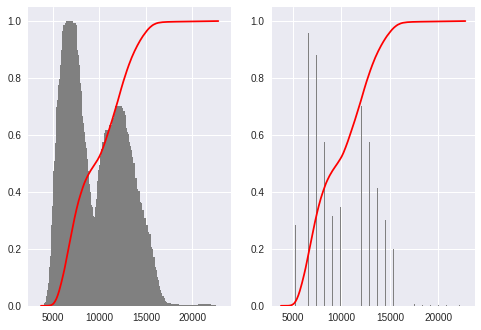

In [56]:
#width를 작게 나눌 때 : 한 칸이 크므로 뭉퉁한 히스토그램이 나옴.
fig = plt.figure()

ax3 = fig.add_subplot(1,2,1)
img3 = ax3.bar(x[:-1], histogram, width=span/25, color="gray")
img3 = ax3.plot(x[:-1], chistogram, color="red")


#width를 크게 나눌 때 

ax4 = fig.add_subplot(1,2,2)
img4 = ax4.bar(x[:-1], histogram, width=span/2560, color="gray")
img4 = ax4.plot(x[:-1], chistogram, color="red")

##03. 분포1

In [0]:
#
# SAMPLE 03. Distribution I
#

#
#
min = np.min(fits.data)
max = np.max(fits.data)
range = max - min
mean = np.mean(fits.data)
median = np.median(fits.data)
percentile = np.percentile(fits.data, [0, 25, 50, 75, 100])

#
#
histogram, x = np.histogram(fits.data, bins=np.arange(min, max, range/256))
chistogram = np.cumsum(histogram)


#
# mode
print("min = %d, max = %d, range = %d"%(min, max, range))
print("mean = %.2f, median = %.2f"%(mean, median))
print("mode = %d"%(x[np.argmax(histogram)]))
print("percentile : ", percentile)


#
# Normalize
histogram = histogram / np.max(histogram)
chistogram = chistogram / np.max(chistogram)

#
# Display
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(fits.data, cmap=cm.gray)
plt.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
img2 = ax2.bar(x[:-1], histogram, width=range/256, color="gray")
img2 = ax2.plot(x[:-1], chistogram, color="red")

mng = plt.get_current_fig_manager()
#mng.window.showMaximized()
plt.show()



##04. 분포2

In [0]:
#
# SAMPLE 04. Distribution II
#

variance = np.var(fits.data)
std = np.std(fits.data)

#
#
histogram, x = np.histogram(fits.data, bins=np.arange(min, max, range/256))
chistogram = np.cumsum(histogram)


#
# mode
print("min = %d, max = %d, range = %d"%(min, max, range))
print("mean = %.2f, median = %.2f"%(mean, median))
print("mode = %d"%(x[np.argmax(histogram)]))
print("percentile : ", percentile)

print("variance = %.2f"%(variance))
print("std= %.2f"%(std))


#
# Normalize
histogram = histogram / np.max(histogram)
chistogram = chistogram / np.max(chistogram)

#
# Display
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(fits.data, cmap=cm.gray)
plt.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
img2 = ax2.bar(x[:-1], histogram, width=range/256, color="gray")
img2 = ax2.plot(x[:-1], chistogram, color="red")

#mng = plt.get_current_fig_manager()
#mng.window.showMaximized()
plt.show()

